## 개념 정리

### 용어 정리
- 회귀: 임의의 수치를 예측하는 문제
- K-최근접 이웃 회귀
       - K-최근접 이웃 알고리즘을 이용해 회귀 문제를 품.
       - 가장 가까운 이웃 샘플을 찾고, 이 샘플들의 타깃값을 평균하여 예측값으로 삼음
- 결정계수(R^2)
    - 회귀문제의 대표적인 성능도구. 1에 가까울수록 좋음.
    - 식 = 1 - ((타깃-예측)^2의 합) / (타깃-평균)^2의 합))
- 과대적합
    - 모델의 훈련 세트 성능이 테스트세트 성능보다 훨씬 높을 때
    - 모델의 성능이 너무 높아, 새로운 샘플에 대한 예측이 잘 안됨
    - 학습 강도를 낮춰야 함: lr을 늘리거나, k를 줄이거나
- 과소적합
    - 훈련 세트와 테스트 세트 성능이 모두 낮거나, 테스트 성능이 높을 때
    - 모델이 단순하여, 적절히 훈련이 되지 않은 경우
    - 학습을 더 시켜야 함: lr을 줄이거나, k를 늘리거나, 데이터를 더 확보

### 핵심 패키지와 함수 (sklearn)
- KNeighborsRegressor
       - K-최근접 이웃 회귀 모델을 만드는 클래스.
       - n_neighbors로 이웃의 갯수를 지정. (기본값은 5)
       - 다른 매개변수는 KNeighborsClassifier 클래스와 거의 동일함.
- mean_absolute_error(target, prediction)
       - 회귀 모델의 평균 오차를 계산함.
       - 타깃과 예측값을 뺀 값을 제곱한 다음, 전체 샘플에 대해 평균한 값을 구함.

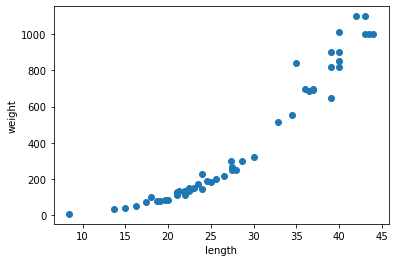

(42, 1) (42, 1)


In [16]:
'''데이터 수집 및 편집하기'''
import numpy as np

# 농어 데이터 입력
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 농어 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42) # 2차원 배열은 받지 않음

# 배열의 차원 확장
train_input = train_input.reshape(-1,1)
train_target = train_target.reshape(-1,1)
print(train_input.shape, train_target.shape)

test_input = test_input.reshape(-1,1)
test_target = test_target.reshape(-1,1)

In [17]:

'''K-최근접 이웃 알고리즘 학습'''
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(train_input,train_target)
print(KNR.score(test_input,test_target)) # 결정계수 값이 출력됨

0.992809406101064


In [42]:
'''학습한 결과를 평가'''
# mean_absolute_error: 타깃과 예측의 절댓값 오차를 평균하여 반환함
from sklearn.metrics import mean_absolute_error

# 테스트 셋에 대한 예측을 만듦
test_prediction = KNR.predict(test_input)

# 테스트 셋에 대한 평균 절댓값 오차를 계산
# 타깃과 예측값의 차이를 구해, 예측이 얼마나 벗어났는지 파악할 수 있음
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [49]:

'''K-최근접 이웃 알고리즘에서 이웃을 증가'''
KNR.n_neighbors = 7
KNR.fit(train_input,train_target)
print("모델 학습 R^2:",KNR.score(train_input,train_target))
print("예측값 R^2:",KNR.score(test_input,test_target))

모델 학습 R^2: 0.9761170732051527
예측값 R^2: 0.9781383949643516


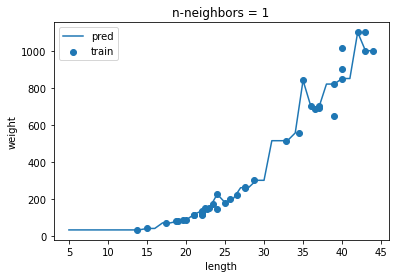

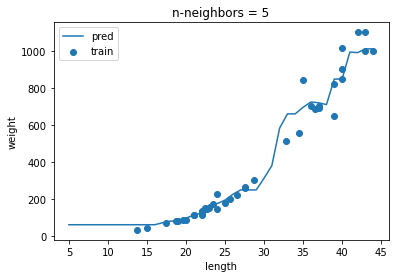

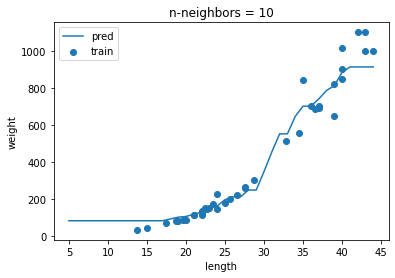

In [56]:
'''K-최근접 이웃 알고리즘에서 이웃을 변화하며, 양상을 관찰'''
# K값을 변화하며 훈련을 진행
x = np.arange(5,45).reshape(-1,1) # x좌표를 만듦

# 1, 5 ,10 일 때 예측 결과를 그래프로 그림
for k in [1,5,10]:
       # 모델을 훈련함
       KNR.n_neighbors = k
       KNR.fit(train_input,train_target)
       # 지정한 범위 x에 대한 예측을 구함
       prediction = KNR.predict(x)

       # 훈련결과와 예측결과를 그래프로 나타냄
       plt.scatter(train_input,train_target, label = "train")
       plt.plot(x, prediction, label = "pred")
       plt.legend()
       plt.title('n-neighbors = {}'.format(k))
       plt.xlabel('length')
       plt.ylabel('weight')
       plt.show()